## Preparation

In [1]:
import numpy as np
import pandas as pd
from tqdm.contrib.concurrent import thread_map
from rdkit import Chem
from project_filtering import BASE_DIR
import numpy as np
import pandas as pd
from rdkit.Chem import MolToSmiles, MolFromSmiles
from rdkit.Chem import AllChem
from tqdm.auto import tqdm
from tqdm.contrib.concurrent import thread_map
import mordred as md

from project_filtering import BASE_DIR
from mordred import Autocorrelation
from mordred import BaryszMatrix

### Loading molecules from METLIN-SMRT

In [ ]:
metlin_df = pd.read_csv(BASE_DIR/"data/input/SMRT_dataset.csv", sep=";")
metlin_df

<Axes: >

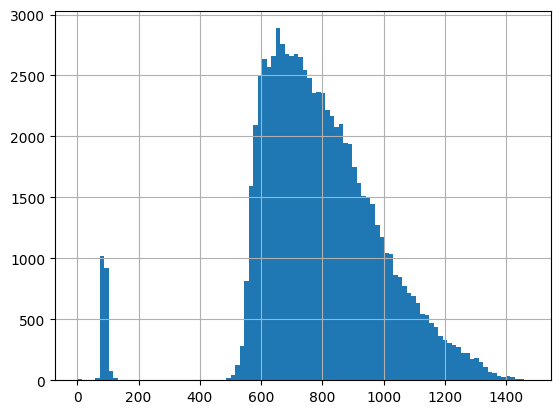

In [3]:
metlin_df["rt"].hist(bins=100)

In [ ]:
molecules = list(map(Chem.MolFromInchi, tqdm(metlin_df["inchi"].to_numpy())))
print(len(molecules))
molecules_valid_mask = [True if x is not None else False for x in molecules]
print(np.count_nonzero(molecules_valid_mask))

  0%|          | 0/80038 [00:00<?, ?it/s]

[14:44:10] Explicit valence for atom # 14 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 14 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 16 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 16 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 16 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 16 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 18 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 18 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 17 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 17 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 15 N, 4, is greater than permitted
[14:44:10] ERROR: Explicit valence for atom # 15 N, 4, is greater than permitted

[14:44:10] Explicit valence for atom # 16 N, 4, is greater than 

In [ ]:
molecules_valid = np.array(molecules)[molecules_valid_mask]
len(molecules_valid)

79957

In [ ]:
smiles_valid = list(map(Chem.MolToSmiles, tqdm(molecules_valid)))
len(smiles_valid)

  0%|          | 0/79957 [00:00<?, ?it/s]

79957

In [ ]:
import re

In [ ]:
inchi_valid = list(map(Chem.inchi.MolToInchi, tqdm(molecules_valid)))

  0%|          | 0/79957 [00:00<?, ?it/s]

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Proton(s) added/removed

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Proton(s) added/removed; Omitted undefined stereo

[16:33:20] WARNING: Omitted undefined stereo

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges were rearranged

[16:33:20] WARNING: Charges 

In [ ]:
inchi_pattern = re.compile(
    r"(InChI=1S/[\w]+/[\w\d\-\(\)\,]+/h[\w\d\,\(\)\-]+)/{0,1}.*")


def truncate_inchi(inchi):
    if inchi is not None:
        match = re.match(inchi_pattern, inchi)
        if match:
            return match[1]
        else:
            return None
    else:
        return None

In [ ]:
truncated_inchi = list(map(truncate_inchi, tqdm(inchi_valid)))

  0%|          | 0/79957 [00:00<?, ?it/s]

In [ ]:
unique_truncated_inchi, unique_inchi_idx = np.unique(truncated_inchi, return_index=True)
len(unique_truncated_inchi), None in unique_truncated_inchi

(79890, False)

In [ ]:
smiles_unique, index_unique = np.unique(smiles_valid, return_index=True)
len(smiles_unique)

79938

In [ ]:
# np.savetxt(BASE_DIR/"data/processed/smiles_unique.txt",smiles_unique,"%s")

In [ ]:
inchi_unique = np.array(inchi_valid)[unique_inchi_idx]
smiles_unique = np.array(smiles_valid)[unique_inchi_idx]

In [ ]:
molecules_unique = molecules_valid[unique_inchi_idx]
len(molecules_unique)

79890

## Using Barysz Descriptors from Mordred

In [15]:
md_barysz_calc = md.Calculator(BaryszMatrix)

In [16]:
md_barysz_calc.descriptors

(mordred.BaryszMatrix.BaryszMatrix('Z', 'SpAbs'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'SpMax'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'SpDiam'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'SpAD'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'SpMAD'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'LogEE'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'SM1'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'VE1'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'VE2'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'VE3'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'VR1'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'VR2'),
 mordred.BaryszMatrix.BaryszMatrix('Z', 'VR3'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'SpAbs'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'SpMax'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'SpDiam'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'SpAD'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'SpMAD'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'LogEE'),
 mordred.BaryszMatrix.BaryszMatrix('m', 'SM1'),
 mordred.BaryszM

In [17]:
md_barysz_calc(molecules_unique[0]).asdict()

{'SpAbs_DzZ': 80.61445667136277,
 'SpMax_DzZ': 40.7828502358144,
 'SpDiam_DzZ': 64.00906956997551,
 'SpAD_DzZ': 81.77159952850563,
 'SpMAD_DzZ': 5.110724970531602,
 'LogEE_DzZ': 40.7828502358144,
 'SM1_DzZ': 1.5428571428571431,
 'VE1_DzZ': 3.95774055823422,
 'VE2_DzZ': 0.24735878488963875,
 'VE3_DzZ': 1.8456769255748748,
 'VR1_DzZ': 71.83470753846416,
 'VR2_DzZ': 4.48966922115401,
 'VR3_DzZ': 4.744371380404302,
 'SpAbs_Dzm': 80.6097463031851,
 'SpMax_Dzm': 40.746909333312885,
 'SpDiam_Dzm': 63.97041608596754,
 'SpAD_Dzm': 81.78138356140002,
 'SpMAD_Dzm': 5.111336472587501,
 'LogEE_Dzm': 40.746909333312885,
 'SM1_Dzm': 1.5621830109531885,
 'VE1_Dzm': 3.9580092273252374,
 'VE2_Dzm': 0.24737557670782734,
 'VE3_Dzm': 1.845744807733457,
 'VR1_Dzm': 71.8140661135142,
 'VR2_Dzm': 4.488379132094638,
 'VR3_Dzm': 4.744083992986125,
 'SpAbs_Dzv': 109.37089552654894,
 'SpMax_Dzv': 53.999163120982075,
 'SpDiam_Dzv': 85.13468630243555,
 'SpAD_Dzv': 108.51303972368343,
 'SpMAD_Dzv': 6.782064982730215

In [18]:
md_barysz_calc(molecules_unique[-1]).asdict()

{'SpAbs_DzZ': 74.92164966053159,
 'SpMax_DzZ': 38.13114562120823,
 'SpDiam_DzZ': 56.55681418830584,
 'SpAD_DzZ': 76.0765769567022,
 'SpMAD_DzZ': 5.07177179711348,
 'LogEE_DzZ': 38.13114562120823,
 'SM1_DzZ': 1.3928571428571428,
 'VE1_DzZ': 3.7983234386801086,
 'VE2_DzZ': 0.2532215625786739,
 'VE3_DzZ': 1.7400248771356541,
 'VR1_DzZ': 64.5743140790653,
 'VR2_DzZ': 4.304954271937687,
 'VR3_DzZ': 4.573281824951816,
 'SpAbs_Dzm': 74.95503384224794,
 'SpMax_Dzm': 38.14591658498257,
 'SpDiam_Dzm': 56.57649802379655,
 'SpAD_Dzm': 76.10665609343505,
 'SpMAD_Dzm': 5.07377707289567,
 'LogEE_Dzm': 38.14591658498257,
 'SM1_Dzm': 1.3888280739756562,
 'VE1_Dzm': 3.798279562791645,
 'VE2_Dzm': 0.253218637519443,
 'VE3_Dzm': 1.7400133256860244,
 'VR1_Dzm': 64.5770757513297,
 'VR2_Dzm': 4.30513838342198,
 'VR3_Dzm': 4.573324591386903,
 'SpAbs_Dzv': 103.9887995464589,
 'SpMax_Dzv': 50.837251263962685,
 'SpDiam_Dzv': 72.79014373860159,
 'SpAD_Dzv': 102.02317865105489,
 'SpMAD_Dzv': 6.80154524340366,
 'Lo

In [19]:
descriptors_md_barysz_unique_df = md_barysz_calc.pandas(molecules_unique,ipynb=True)

  0%|          | 0/79890 [00:00<?, ?it/s]

In [ ]:
descriptors_md_barysz_unique_df.insert(0,"smiles",smiles_unique)
descriptors_md_barysz_unique_df.insert(0,"inchi",inchi_unique)
descriptors_md_barysz_unique_df

In [21]:
descriptors_md_barysz_unique_df.to_csv(BASE_DIR/"data/processed/descriptors_barysz_unique.csv",sep=";")

## Using Autocorrelation Descriptors from Mordred

In [22]:
md_autocorr_calc = md.Calculator(Autocorrelation)

In [23]:
md_autocorr_calc.descriptors

(mordred.Autocorrelation.ATS(0, 'dv'),
 mordred.Autocorrelation.ATS(1, 'dv'),
 mordred.Autocorrelation.ATS(2, 'dv'),
 mordred.Autocorrelation.ATS(3, 'dv'),
 mordred.Autocorrelation.ATS(4, 'dv'),
 mordred.Autocorrelation.ATS(5, 'dv'),
 mordred.Autocorrelation.ATS(6, 'dv'),
 mordred.Autocorrelation.ATS(7, 'dv'),
 mordred.Autocorrelation.ATS(8, 'dv'),
 mordred.Autocorrelation.ATS(0, 'd'),
 mordred.Autocorrelation.ATS(1, 'd'),
 mordred.Autocorrelation.ATS(2, 'd'),
 mordred.Autocorrelation.ATS(3, 'd'),
 mordred.Autocorrelation.ATS(4, 'd'),
 mordred.Autocorrelation.ATS(5, 'd'),
 mordred.Autocorrelation.ATS(6, 'd'),
 mordred.Autocorrelation.ATS(7, 'd'),
 mordred.Autocorrelation.ATS(8, 'd'),
 mordred.Autocorrelation.ATS(0, 's'),
 mordred.Autocorrelation.ATS(1, 's'),
 mordred.Autocorrelation.ATS(2, 's'),
 mordred.Autocorrelation.ATS(3, 's'),
 mordred.Autocorrelation.ATS(4, 's'),
 mordred.Autocorrelation.ATS(5, 's'),
 mordred.Autocorrelation.ATS(6, 's'),
 mordred.Autocorrelation.ATS(7, 's'),
 mo

In [24]:
descriptors_md_autocorr_unique_df = md_autocorr_calc.pandas(molecules_unique,ipynb=True)


  0%|          | 0/79890 [00:00<?, ?it/s]

In [ ]:
descriptors_md_autocorr_unique_df.insert(0,"smiles",smiles_unique)
descriptors_md_autocorr_unique_df.insert(0,"inchi",inchi_unique)
descriptors_md_autocorr_unique_df

In [26]:
descriptors_md_autocorr_unique_df.to_csv(BASE_DIR/"data/processed/descriptors_autocorr_unique.csv",sep=";")

## Merging Autocorrelation Descriptors with Random Coefficients

In [ ]:
ds_auto_df = pd.read_csv(
    BASE_DIR/"data/processed/descriptors_autocorr_unique.csv", sep=";", index_col=0, low_memory=False)
ds_auto_df

In [4]:
clean_ds_auto = ds_auto_df.loc[:,ds_auto_df.dtypes==float]
clean_ds_auto.insert(0,"smiles",ds_auto_df["smiles"])
clean_ds_auto.insert(0,"inchi",ds_auto_df["inchi"])

In [ ]:
clean_ds_auto

In [29]:
np.save(BASE_DIR/"data/processed/autocorr-descriptors.npy",clean_ds_auto.columns[2:].to_numpy(dtype=str),allow_pickle=False)
clean_ds_auto.columns[2:].to_list()

['ATS0dv',
 'ATS1dv',
 'ATS2dv',
 'ATS3dv',
 'ATS4dv',
 'ATS5dv',
 'ATS6dv',
 'ATS7dv',
 'ATS8dv',
 'ATS0d',
 'ATS1d',
 'ATS2d',
 'ATS3d',
 'ATS4d',
 'ATS5d',
 'ATS6d',
 'ATS7d',
 'ATS8d',
 'ATS0s',
 'ATS1s',
 'ATS2s',
 'ATS3s',
 'ATS4s',
 'ATS5s',
 'ATS6s',
 'ATS7s',
 'ATS8s',
 'ATS0Z',
 'ATS1Z',
 'ATS2Z',
 'ATS3Z',
 'ATS4Z',
 'ATS5Z',
 'ATS6Z',
 'ATS7Z',
 'ATS8Z',
 'ATS0m',
 'ATS1m',
 'ATS2m',
 'ATS3m',
 'ATS4m',
 'ATS5m',
 'ATS6m',
 'ATS7m',
 'ATS8m',
 'ATS0v',
 'ATS1v',
 'ATS2v',
 'ATS3v',
 'ATS4v',
 'ATS5v',
 'ATS6v',
 'ATS7v',
 'ATS8v',
 'ATS0se',
 'ATS1se',
 'ATS2se',
 'ATS3se',
 'ATS4se',
 'ATS5se',
 'ATS6se',
 'ATS7se',
 'ATS8se',
 'ATS0pe',
 'ATS1pe',
 'ATS2pe',
 'ATS3pe',
 'ATS4pe',
 'ATS5pe',
 'ATS6pe',
 'ATS7pe',
 'ATS8pe',
 'ATS0are',
 'ATS1are',
 'ATS2are',
 'ATS3are',
 'ATS4are',
 'ATS5are',
 'ATS6are',
 'ATS7are',
 'ATS8are',
 'ATS0p',
 'ATS1p',
 'ATS2p',
 'ATS3p',
 'ATS4p',
 'ATS5p',
 'ATS6p',
 'ATS7p',
 'ATS8p',
 'ATS0i',
 'ATS1i',
 'ATS2i',
 'ATS3i',
 'ATS4i',
 'ATS

In [6]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()
scaled_ds_auto = pd.DataFrame(scaler.fit_transform(clean_ds_auto.drop(columns=["smiles", "inchi"])))
scaled_ds_auto.insert(0,"smiles", clean_ds_auto["smiles"])
scaled_ds_auto.insert(0,"inchi", clean_ds_auto["inchi"])
scaled_ds_auto

In [30]:
np.save(BASE_DIR/"data/processed/autocorr-synthetic-mean.npy", scaler.mean_)
np.save(BASE_DIR/"data/processed/autocorr-synthetic-scale.npy", scaler.scale_)

<Axes: >

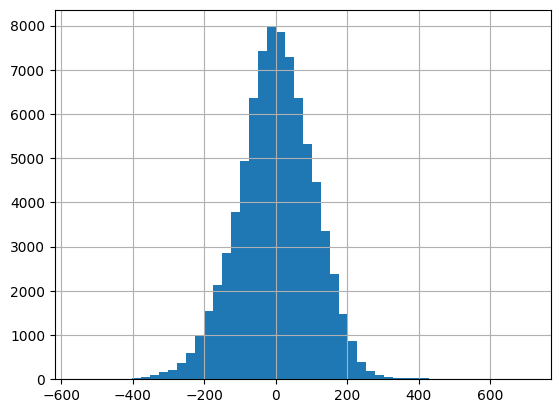

In [31]:
scaled_ds_auto.drop(columns=["smiles","inchi"]).sum(axis=1).hist(bins=50)

In [33]:
scaled_ds_auto.to_csv(BASE_DIR/"data/processed/descriptors_autocorr_clean_scaled.csv",sep=";")

<Axes: >

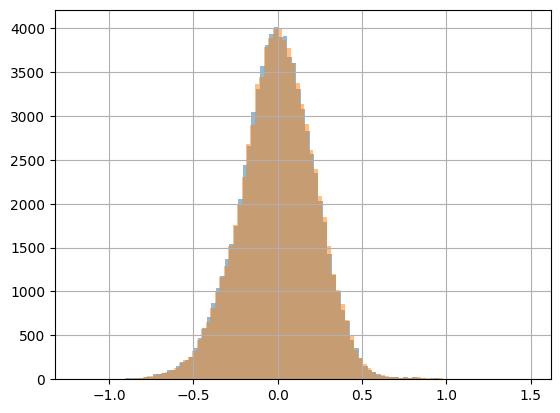

In [9]:
rng = np.random.default_rng(seed=42)
random_coeffs = rng.random(len(scaled_ds_auto.columns)-2)
mix_ds = random_coeffs*scaled_ds_auto.drop(columns=["smiles","inchi"])/np.sum(random_coeffs)
mix_ds = mix_ds.sum(axis=1)

out_df = pd.DataFrame()
out_df["smiles"] = scaled_ds_auto["smiles"].to_numpy()
out_df["inchi"] = scaled_ds_auto["inchi"].to_numpy()
out_df["values"] = mix_ds.to_numpy()
out_df.to_csv(BASE_DIR/"data/processed/synthetic-clean-dataset.csv",sep=";")

noise = rng.normal(0,0.015,len(mix_ds))
mix_ds.hist(bins=100, alpha=0.5)
mix_ds += noise
mix_ds.hist(bins=100, alpha=0.5)

In [37]:
import matplotlib.pyplot as plt

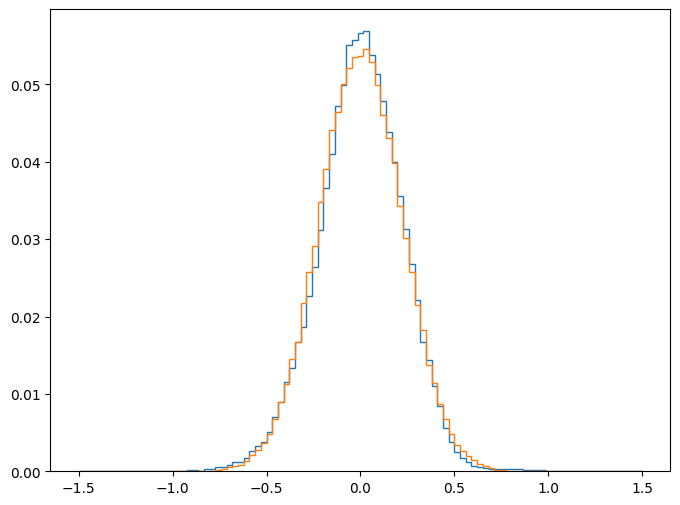

In [ ]:
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
bins = np.linspace(-1.5,1.5,100)
plt.stairs(values=np.histogram(mix_ds, bins = bins)[0]/len(mix_ds),edges=bins)
plt.stairs(values=np.histogram(rng.normal(0,1/4.5,len(mix_ds)), bins = bins)[0]/len(mix_ds),edges=bins)

In [ ]:
mix_df = pd.DataFrame()
mix_df["smiles"] = scaled_ds_auto["smiles"].to_numpy()
mix_df["inchi"] = scaled_ds_auto["inchi"].to_numpy()
mix_df["values"] = mix_ds.to_numpy()
mix_df

In [82]:
mix_df.to_csv(BASE_DIR/"data/processed/synthetic-dataset.csv", sep=";")

## Shuffled Dataset

In [ ]:
synth_df = pd.read_csv(BASE_DIR/"data/processed/synthetic-dataset.csv", index_col=0, sep = ";")
synth_df

In [17]:
rng = np.random.default_rng(seed=42)
for i in [1,2.5,5,10,0.5]:
    new_synth_df = synth_df.copy(deep=True)
    shuffle_idx = rng.choice(len(synth_df),size=int((i/100)*len(synth_df)), replace=False, shuffle=True)
    new_synth_df.iloc[sorted(shuffle_idx),2] = synth_df.iloc[shuffle_idx,2]
    new_synth_df.to_csv(BASE_DIR/f"data/processed/synthetic-shuffle-{i}.csv", sep=";")

In [18]:
for i in [1,2.5,5,10,0.5]:
    new_synth_df = pd.read_csv(BASE_DIR/f"data/processed/synthetic-shuffle-{i}.csv", index_col=0, sep = ";")
    print(np.count_nonzero(1-np.isclose(new_synth_df["values"],synth_df["values"])))

795
1995
3994
7985
399


## More realistic Dataset
values are not centered around 0

In [ ]:
ds_auto_df = pd.read_csv(
    BASE_DIR/"data/processed/descriptors_autocorr_unique.csv", sep=";", index_col=0, low_memory=False)
ds_auto_df

In [11]:
clean_ds_auto = ds_auto_df.loc[:,ds_auto_df.dtypes==float]
clean_ds_auto.insert(0,"smiles",ds_auto_df["smiles"])
clean_ds_auto.insert(0,"inchi",ds_auto_df["inchi"])

In [13]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaled_ds_auto = pd.DataFrame(StandardScaler().fit_transform(clean_ds_auto.drop(columns=["smiles", "inchi"])))
scaled_ds_auto.insert(0,"smiles", clean_ds_auto["smiles"])
scaled_ds_auto.insert(0,"inchi", clean_ds_auto["inchi"])
scaled_ds_auto

<Axes: >

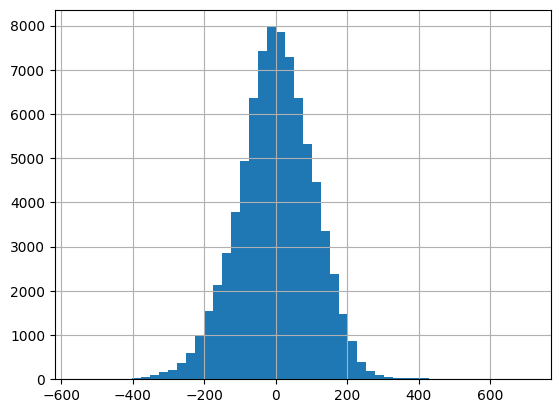

In [15]:
scaled_ds_auto.drop(columns=["smiles","inchi"]).sum(axis=1).hist(bins=50)

In [16]:
scaled_ds_auto.drop(columns=["smiles","inchi"]).sum(axis=1).describe()

count    7.989000e+04
mean    -2.768671e-14
std      1.061873e+02
min     -5.553778e+02
25%     -6.670219e+01
50%      1.113845e+00
75%      7.061202e+01
max      7.069657e+02
dtype: float64

count    79890.000000
mean         1.499976
std          0.224561
min          0.329670
25%          1.359431
50%          1.503761
75%          1.649568
max          2.986548
dtype: float64


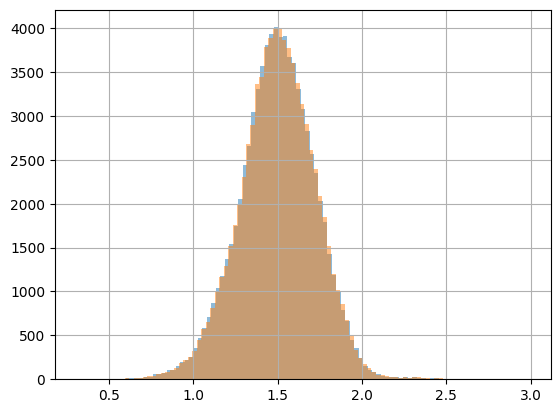

In [20]:
rng = np.random.default_rng(seed=42)
random_coeffs = rng.random(len(scaled_ds_auto.columns)-2)
mix_ds = random_coeffs*scaled_ds_auto.drop(columns=["smiles","inchi"])/np.sum(random_coeffs)
mix_ds = mix_ds.sum(axis=1)
mix_ds+=1.5
noise = rng.normal(0,0.015,len(mix_ds))
mix_ds.hist(bins=100, alpha=0.5)
mix_ds += noise
mix_ds.hist(bins=100, alpha=0.5)
print(mix_ds.describe())

<Axes: >

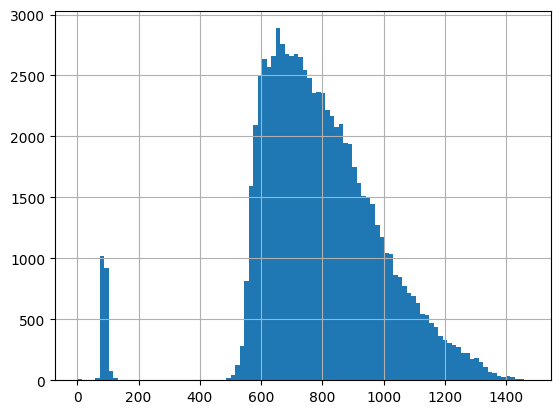

In [21]:
metlin_df["rt"].hist(bins=100)

In [22]:
import matplotlib.pyplot as plt

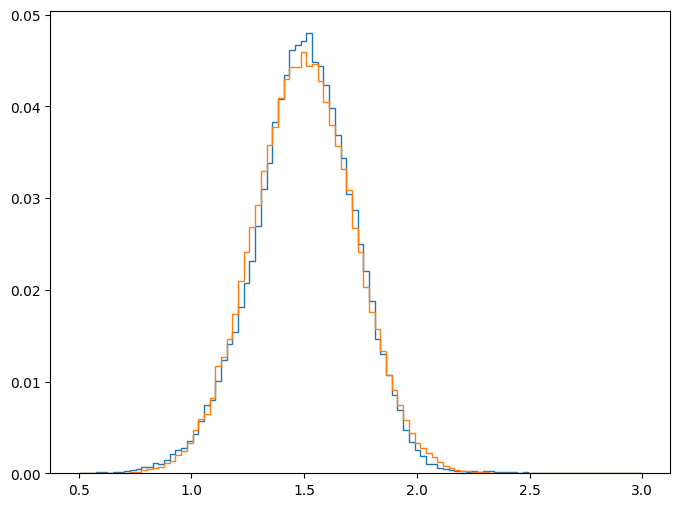

In [23]:
fig,ax = plt.subplots(1,1,figsize=(8,6),dpi=100)
bins = np.linspace(0.5,3,100)
plt.stairs(values=np.histogram(mix_ds, bins = bins)[0]/len(mix_ds),edges=bins)
plt.stairs(values=np.histogram(rng.normal(1.5,1/4.5,len(mix_ds)), bins = bins)[0]/len(mix_ds),edges=bins)

In [24]:
mix_ds

0        1.038477
1        0.734759
2        0.909396
3        0.966069
4        1.028004
           ...   
79885    1.159968
79886    1.109609
79887    1.361297
79888    0.536704
79889    1.060414
Length: 79890, dtype: float64

In [ ]:
mix_df = pd.DataFrame()
mix_df["smiles"] = scaled_ds_auto["smiles"].to_numpy()
mix_df["inchi"] = scaled_ds_auto["inchi"].to_numpy()
mix_df["values"] = mix_ds.to_numpy()
mix_df

In [27]:
mix_df.to_csv(BASE_DIR/"data/processed/synthetic-dataset-realistic.csv", sep=";")

In [28]:
rng = np.random.default_rng(seed=42)
for i in [1,2.5,5,10,25,50]:
    new_mix_df =mix_df.copy(deep=True)
    shuffle_idx = rng.choice(len(mix_df),size=int((i/100)*len(mix_df)), replace=False, shuffle=True)
    new_mix_df.iloc[sorted(shuffle_idx),2] =mix_df.iloc[shuffle_idx,2]
    new_mix_df.to_csv(BASE_DIR/f"data/processed/synthetic-realistic-shuffle-{i}.csv", sep=";")

In [30]:
for i in [1,2.5,5,10,25,50]:
    new_synth_df = pd.read_csv(BASE_DIR/f"data/processed/synthetic-realistic-shuffle-{i}.csv", index_col=0, sep = ";")
    print(np.count_nonzero(1-np.isclose(new_synth_df["values"],mix_df["values"])))

795
1995
3994
7985
19969
39942


## Variable Addition

In [ ]:
synth_df = pd.read_csv(BASE_DIR/"data/processed/synthetic-dataset.csv", index_col=0, sep = ";")
synth_df

In [17]:
synth_df["values"].describe()

count    79890.000000
mean        -0.000024
std          0.224561
min         -1.170330
25%         -0.140569
50%          0.003761
75%          0.149568
max          1.486548
Name: values, dtype: float64

In [17]:
spread = synth_df["values"].max()-synth_df["values"].min()
spread, spread/30

(2.6568784209036576, 0.08856261403012192)

In [20]:
rng = np.random.default_rng(seed=42)
for i in [1, 2.5, 5, 10, 0.5]:
    for delta in [0.001, 0.0025, 0.005, 0.01, 0.025, 0.05, 0.1]:
        new_mix_df = synth_df.copy(deep=True)
        mod_idx = rng.choice(
            len(synth_df),
            size=int((i / 100) * len(synth_df)),
            replace=False,
            shuffle=False,
        )
        new_mix_df.iloc[mod_idx, 2] = new_mix_df.iloc[mod_idx, 2] + delta
        new_mix_df.to_csv(
            BASE_DIR / f"data/processed/synthetic-variable-mu-{delta}-{i}.csv", sep=";"
        )

In [21]:
rng = np.random.default_rng(seed=42)
for i in [1, 2.5, 5, 10, 0.5]:
    for delta in [0.125, 0.15]:
        new_mix_df = synth_df.copy(deep=True)
        mod_idx = rng.choice(
            len(synth_df),
            size=int((i / 100) * len(synth_df)),
            replace=False,
            shuffle=False,
        )
        new_mix_df.iloc[mod_idx, 2] = new_mix_df.iloc[mod_idx, 2] + delta
        new_mix_df.to_csv(
            BASE_DIR / f"data/processed/synthetic-variable-mu-{delta}-{i}.csv", sep=";"
        )

In [18]:
rng = np.random.default_rng(seed=42)
for i in [1, 2.5, 5, 10, 0.5]:
    for delta in [0.175, 0.2, 0.25]:
        new_mix_df = synth_df.copy(deep=True)
        mod_idx = rng.choice(
            len(synth_df),
            size=int((i / 100) * len(synth_df)),
            replace=False,
            shuffle=False,
        )
        new_mix_df.iloc[mod_idx, 2] = new_mix_df.iloc[mod_idx, 2] + delta
        new_mix_df.to_csv(
            BASE_DIR / f"data/processed/synthetic-variable-mu-{delta}-{i}.csv", sep=";"
        )

In [27]:
rng = np.random.default_rng(seed=42)
for i in [1,2.5,5,10,0.5]:
    for delta in [0.030,0.035,0.040,0.045,0.055,0.060,0.065,0.070,0.075,0.080,0.085,0.090,0.095]:
        new_mix_df = synth_df.copy(deep=True)
        mod_idx = rng.choice(len(synth_df),size=int((i/100)*len(synth_df)), replace=False, shuffle=False)
        new_mix_df.iloc[mod_idx,2] = new_mix_df.iloc[mod_idx,2] + delta
        new_mix_df.to_csv(BASE_DIR/f"data/processed/synthetic-variable-mu-{delta}-{i}.csv", sep=";")

In [26]:
for i in [1,2.5,5,10]:
    new_synth_df = pd.read_csv(BASE_DIR/f"data/processed/synthetic-constant-0.03-spread-{i}.csv", index_col=0, sep = ";")
    print(np.count_nonzero(1-np.isclose(new_synth_df["values"],synth_df["values"])))

798
1997
3994
7989
